# Problem Set 3

This problem set assumes you can work with pandas.  Consult McKinney
Ch 5 _Getting Started with pandas_ (chapter numbering varies between
                                    editions).  Matplotlib is briefly
discussed in McKinney Ch 9.  Ch 10: _Data Aggregation and Group
Operations_ explains the, well, grouped operations.


In [1]:
# Let's import the important packages.  Depending on how do your
# exactly proceed, you may need more than these here.  

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  
import matplotlib.pylab as pylab

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)

Numpy version:        1.18.1
SciPy version:         1.4.1
Pandas version:        1.0.1
Maplotlib version:     3.1.3
Scikit-Learn version: 0.22.1


---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data
Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read
about the dataset carefully before continuing -- it is worth investing
a few minutes up front otherwise you are likely to be hopelessly
confused! 



In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print( bdata.keys())
print( bdata.feature_names)
print( bdata.data.shape)
print( bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
boston = pd.DataFrame(bdata.data)

In [5]:
boston.columns = bdata.feature_names[:]
print( boston.shape)
print(boston.head())

(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The
first thing to do is to make sure you understand how the data is
organized, what the data types are, whether there is any missing data,
and so forth. Get your bearings on your own, then answer the following
questions.

 - a: How many different variables are there in the dataset, and
      how many different observations?
 - b: how many variables are not coded as numeric?  Hint: series has a
      _dtype_ property.
 - c: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - d: Show that dataset does not contain any missing values.
 - e: Display the property tax rate in the 5 neighborhoods that have
      the lowest median housing price.

In [6]:
# a
print(boston.shape)

(506, 13)


In [7]:
# b
print(boston.dtypes, "\n")
print(boston.dtypes.value_counts())

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object 

float64    13
dtype: int64


In [8]:
# c
len(boston[boston.CHAS == 1])

35

In [9]:
# d
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
# e
boston['MEDV'] = bdata.target # get medians
boston.nsmallest(5, 'MEDV')[['TAX']] # get tax of lowest 5 medians

,TAX
398,666.0
405,666.0
400,666.0
399,666.0
414,666.0


*Provide our answers below:*

 - a: There are 506 observations with 13 variables
 - b: All variables are coded as numeric (float64)
 - c: Number of neighborhoods where tract bounds Charles River: 35
 - d: The dataset does not contain any null values as shown above
 - e: Above is displayed the property tax rate in the 5 neighborhoods that have the lowest median housing price

### 1.2: Answer some basic questions about the data

 - 1.2 a: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2 b: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2 c: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2 d: Are homes in old neighborhoods smaller?  Compare the average
          number of rooms in the 5 oldest and 5 youngest neighborhood.
 - 1.2 e: What is the crime rate in the neighborhood with the lowest median housing price?

In [11]:
# a
max(boston['MEDV']) * 1000

50000.0

In [12]:
# b
len(boston[boston['RM'] < 5])

15

In [13]:
# c
most_expensive = boston[boston['MEDV'] == max(boston['MEDV'])]

charles_expensive = most_expensive[most_expensive['CHAS'] == 1]
most_expensive[most_expensive['CHAS'] == 1][['TAX', 'MEDV']]

,TAX,MEDV
162,403.0,50.0
163,403.0,50.0
283,198.0,50.0
369,666.0,50.0
370,666.0,50.0
372,666.0,50.0


In [14]:
# d
old = boston.nlargest(5, 'AGE')['RM'].mean()
new = boston.nsmallest(5, 'AGE')['RM'].mean()

print('new: ', new)
print('old: ', old)

print("Are homes in old neighborhoods smaller?", "\n", old < new)

new:  6.333600000000001
old:  5.587599999999999
Are homes in old neighborhoods smaller? 
 True


In [15]:
# e
boston[boston['MEDV'] == min(boston['MEDV'])].CRIM

398    38.3518
405    67.9208
Name: CRIM, dtype: float64

*Provide our answers below:*

 - 1.2.1: 50
 - 1.2.2: 15
 - 1.2.3: There are *multiple* tax rates for the most expensive neighborhoods (MDEV = 50) that are also adjacent to the Charles River. *3 are 666, 2 are 403, and 1 is 198*
 - 1.2.4: Homes in old neighborhoods are smaller than the homes in new neighborhoods
 - 1.2.5: The crime rates for the 2 neighborhoods with the lowest median housing prices is 38.3518 and 67.9208

### 1.3: Summary statistics

Create a clean, organized table that shows just the following
information (no more, no less) for each variable in the dataset.  Your
table should have K rows (one for each variable) and 7
columns, ordered as below:

- The name of the variable
- The number of observations with non-missing values
- The mean of the variable
- The standard deviation of the variable
- The minimum value of the variable
- The median of the variable
- The maximum value of the variable

In [16]:
summary = boston.describe().transpose()
summary.columns = ['count','mean','std','min','25%','median','75%','max']
summary[['count','mean','std','min','median','max']]

,count,mean,std,min,median,max
CRIM,506.0,3.613524,8.601545,0.00632,0.25651,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506.0,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506.0,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506.0,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical test

Are newer homes more expensive?  Perhaps, as these are more modern.
But the old ones may be located in more desirable neighborhoods.
Let's find out!

- a: Split the sample into 'new' and 'old' neighborhoods using the median
age in the data as the threshold value.  (Let's ignore the neighborhoods where average
age is exactly equal to the median and only focus on older and newer ones).
- b: show the average house values in old and new neighborhoods.
- c: Using a t-test, compare the median house value in old and new
neighborhoods.  Can you reject the null hypothesis that prices are equal?

Hint: check for _t_-test in `scipy.stats`.

In [17]:
# a: Split dataset into new and old using the median age
new = boston[boston.AGE < boston.AGE.median()]
old = boston[boston.AGE > boston.AGE.median()]

# b: show the average house values in old and new neighborhoods
print('Average price of old houses: ', old.MEDV.mean())
print('Average price of new houses: ', new.MEDV.mean())

# c: Using a t-test, compare the median house value in old and new neighborhoods
from scipy.stats import ttest_ind
ttest_ind(new.MEDV, old.MEDV)

Average price of old houses:  19.25889328063241
Average price of new houses:  25.80671936758895


Ttest_indResult(statistic=8.561415451892593, pvalue=1.3572590662954446e-16)

The null hypothesis can be rejected because the p value is less than 0.05. Therefore, we can say that newer homes are more expensive (or a different price) than older homes with statistical significance.

### 1.5 Grouped Operations

In these exercise, you **have to use _groupby_** grouping operator.

#### 1.5.1 Price and number of rooms

How does the average house price depend on the number of rooms?
Compute the mean price by number of rooms.  Note: as this is _average
number of rooms_, you have to convert it to an integer, or make it
categorical in another way.


In [18]:
## compute it here.  Use 'groupy' operator!
boston['RM_INT'] = boston.RM.astype(int)
boston.groupby('RM_INT').MEDV.mean()

RM_INT
3    25.300000
4    16.023077
5    17.487342
6    22.015985
7    36.917647
8    44.200000
Name: MEDV, dtype: float64

#### 1.5.2 size and location

But the price may not just depend on the size but also on location.
Analyze the average price depending on size (as above), depending on
whether the neighborhood is adjacent to Charles river or not.

In [19]:
## analyze it here, use groupby
boston.groupby(['RM_INT','CHAS']).MEDV.mean()

RM_INT  CHAS
3       0.0     25.300000
4       0.0     16.023077
5       0.0     17.133333
        1.0     22.218182
6       0.0     21.769170
        1.0     25.918750
7       0.0     35.964444
        1.0     44.066667
8       0.0     45.700000
        1.0     35.950000
Name: MEDV, dtype: float64

## Part 2: Histograms and Scatterplots

### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic
histogram of median housing prices (the "target" variable) for your
dataset.  Your first task is to make this graph look pretty by doing
the following:

1. Add appropriate titles and labels to, make sure to explain the units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black
borders from the bars
5. Ensure the histogram does not result in printing incomprehensible list of numbers in the output cell as this sample code does. 


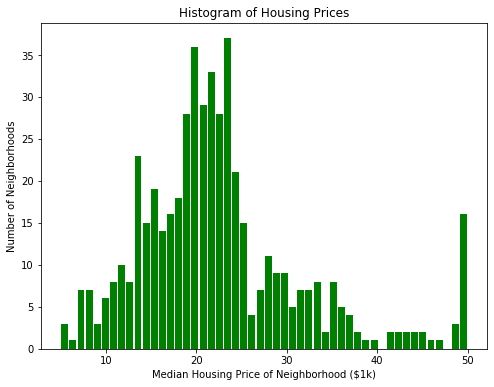

In [20]:
# edit the code below to make the graph look good
fig = plt.figure(figsize = (8, 6))
plt.hist(bdata.target, bins = 50, rwidth= 0.85, color='green')
plt.title('Histogram of Housing Prices')
plt.xlabel("Median Housing Price of Neighborhood ($1k)")
plt.ylabel("Number of Neighborhoods")
plt.show()

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.


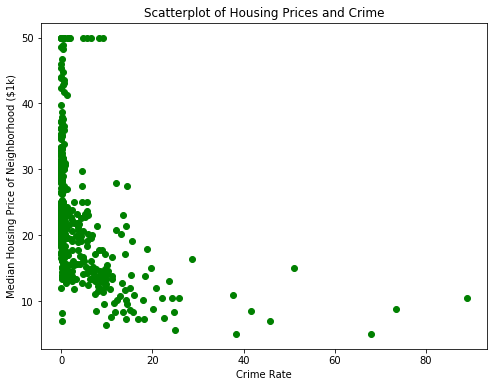

In [21]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(boston.CRIM, boston.MEDV, facecolor='green')
plt.title('Scatterplot of Housing Prices and Crime')
plt.xlabel("Crime Rate")
plt.ylabel("Median Housing Price of Neighborhood ($1k)")
plt.show()

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be
a relationship between crime rates and housing prices in Boston?
Calculate the correlation between these two variables. Do you think
this relationship is causal, or just a correlation?   Can you provide
examples of all 3 ways the causality may go here?

In [22]:
# compute correlation (should be b/w -1 and 1)
print('p value: ', sp.stats.ttest_ind(boston.MEDV, boston.CRIM, equal_var=False).pvalue)
print('correlation: ', np.corrcoef(boston.MEDV, boston.CRIM)[0, 1])

p value:  6.889715066581337e-168
correlation:  -0.3883046085868113


The scatterplot shows that as Crime Rate increases, Median Housing Price of Neighborhood decreases. This correlation seems to be less so when crime is higher. With a p value less than 0.05, we can see that this relationship is statistically significant.

We can provide examples of all 3 ways of causality that may go here:
1. Higher Crime Rate causes Median Housing Price of Neighborhood to go down, as the neighborhood would be considered more dangerous and less desirable.
2. A lower Median Housing Price of Neighborhood causes higher Crime Rate. Poorer areas may harbor people who are more affiliated with crime, or perhaps richer areas are more protected (gates, police, etc.) and crime is hard to follow through.
3. Another factor is affecting the relationship between Crime Rate and Median Housing Price of Neighborhood (i.e. a big event happening in the area that may trigger more crime).

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the
dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*)
cell is the correlation between the *i*th and *j*th variable. Show off
your skills by coloring the cell so that large positive correlations
appear green and large negative correlations appear red (use a
gradient to make this pretty). What two variables appear to me most
positively and negatively correlated?

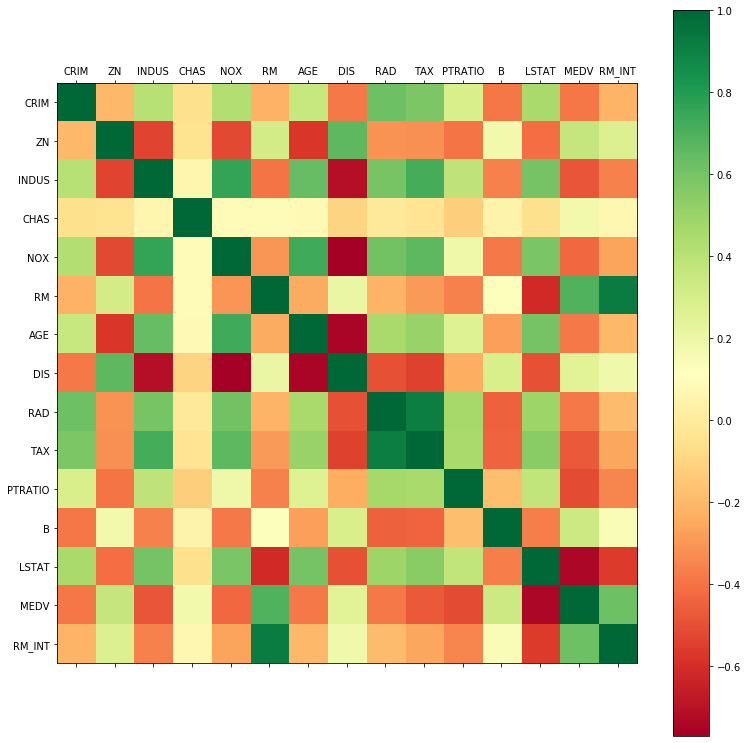

In [23]:
# enter your code here
## hint: check out matplotlib colorbar function
fig = plt.figure(figsize = (13, 13))
plt.matshow(boston.corr(), fignum = fig.number)
plt.xticks(range(len(boston.columns)), boston.columns)
plt.yticks(range(len(boston.columns)), boston.columns)

plt.imshow(boston.corr(), cmap='RdYlGn');
plt.colorbar()

plt.show()

*What two variables appear to be most positively and negatively correlated?* Well, we can see that *RAD* and *TAX* have a strong positive correlation of 0.91, while *AGE* and *DIS* have a strong negative correlation of 0.75.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting
pattern in the data.  Be creative in your visualization, and make sure
to produce a "publication-quality" graph.  Points will be given for
useful and creative graphs; points will be deducted for confusing
issues like unlabeled axes.  If you're new to data visualization,
[this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209)
is a good place to start.

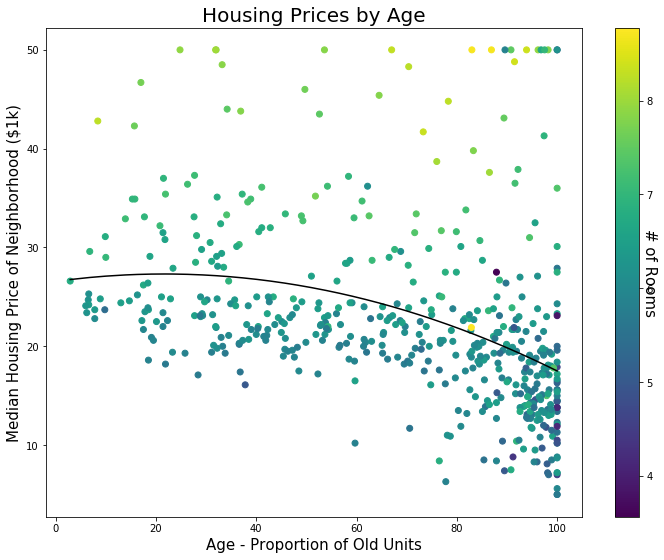

In [24]:
# enter your code here
#plt.scatter(boston.PTRATIO, boston.MEDV, s=boston.AGE, c=boston.RM, alpha=0.5)
fig = plt.figure(figsize = (12, 9))
plt.scatter(boston.AGE, boston.MEDV, c=boston.RM)

# draw line
plt.plot(np.unique(boston.AGE), np.poly1d(np.polyfit(boston.AGE, boston.MEDV, 2))
         (np.unique(boston.AGE)), color = 'black')

# labels
plt.title('Housing Prices by Age', size = 20)
plt.xlabel("Age - Proportion of Old Units", size = 15)
plt.ylabel("Median Housing Price of Neighborhood ($1k)", size = 15)
cbar = plt.colorbar()
cbar.set_label('# of Rooms', rotation=270, size = 15)

plt.show()

We can compare the median housing price of neighborhood by the proportion of old units (prior to 1940). We see that as age increases, the median housing price decreases. We use color to show the relationship of housing size (measured by number of rooms) to the housing price and age. We can see darker purple units (less rooms) more on the side of lower median housing price and higher age. 